<a href="https://colab.research.google.com/github/ivanna0994/seriesdetiempo/blob/main/Codigoseriesdetiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U jupyter-book


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.1/430.1 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.7/572.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.8 MB/s eta 0:00:00
  Attempting uninstall: docutils
    Found existing installat

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cd /content/drive/MyDrive/ && jupyter-book create mi_libro



Your book template can be found at

    mi_libro/




In [ ]:
from google.colab import files
files.view("/content/drive/MyDrive/mi_libro/_config.yml")

<IPython.core.display.Javascript object>

In [ ]:
!cd /content/drive/MyDrive/mi_libro && jupyter-book build .


Running Jupyter-Book v1.0.3
Source Folder: /content/drive/MyDrive/mi_libro
Config Path: /content/drive/MyDrive/mi_libro/_config.yml
Output Path: /content/drive/MyDrive/mi_libro/_build/html
Running Sphinx v7.4.7
loading translations [en]... done
making output directory... done
[etoc] Changing master_doc to 'intro'
checking bibtex cache... out of date
parsing bibtex file /content/drive/MyDrive/mi_libro/references.bib... parsed 5 entries
myst v2.0.0: MdParserConfig(commonmark_only=False, gfm_only=False, enable_extensions={'tasklist', 'dollarmath', 'linkify', 'substitution', 'colon_fence'}, disable_syntax=[], all_links_external=False, url_schemes=('mailto', 'http', 'https'), ref_domains=None, fence_as_directive=set(), number_code_blocks=[], title_to_header=False, heading_anchors=0, heading_slug_func=None, html_meta={}, footnote_transition=True, words_per_minute=200, substitutions={}, linkify_fuzzy_links=True, dmath_allow_labels=True, dmath_allow_space=True, dmath_allow_digits=True, dmath_d

In [ ]:
#Cargamos librerias
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from scipy.stats import shapiro
from IPython import get_ipython
from IPython.display import display

In [ ]:
# Cargamos datos
file_path = '/content/jena_climate_2009_2016.csv'
df = pd.read_csv(file_path)
print(df.head())

             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03        

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB
None


Esta base de datos contiene 420551 filas y 15 columnas

In [ ]:
print('No. of rows, columns:', df.shape)

No. of rows, columns: (420551, 15)


Para verificar sí existen o no datos faltantes, se procede a realizar la consulta a nuestra base de datos

In [ ]:
print(df.isnull().sum())

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64


Encontrándose así que no existen datos nulos.

El dataset contiene datos climáticos con registros cada 10 minutos.
La variable "Date Time" está en formato de texto y debe convertirse a formato de fecha y hora.
La variable de interés "T (degC)" representa la temperatura en grados Celsius.
Nuestro análisis se centrará en las variables, día, mes y año y hora en que fue tomada la temperatura, el cual se encuentra en el conjunto de datos bajo el nombre de 'Date Time' así como también la variable temperatura que contiene los valores de esta, y en el conjunto de datos se encuentra como T(degC)

In [ ]:
# Convertir la columna "Date Time" a formato datetime
df["Date Time"] = pd.to_datetime(df["Date Time"], format="%d.%m.%Y %H:%M:%S")

# Verificar el rango de fechas en el dataset
date_range = df["Date Time"].min(), df["Date Time"].max()



Ya hecha la transformación de la variable Date time, se realiza una breve descripción estadística de la variable a estudiar, que en este caso es Temperatura medida en grados celsius.

In [ ]:
# Descripción estadística de la variable T (degC)
temperature_stats = df['T (degC)'].describe()
print(temperature_stats)

count    420551.000000
mean          9.450147
std           8.423365
min         -23.010000
25%           3.360000
50%           9.420000
75%          15.470000
max          37.280000
Name: T (degC), dtype: float64


Como se mencionó anteriormente, para la variable Temperatura en grados celsius, se tienen 420551 observaciones, con una media de 9.45° y una desviación estándar de 8.42°.
Dentro de estas observaciones el valor mínimo que toma esta variable es de -23.01° mientras que su valor máximo es de 37.28°.
Es importante señalar que el cincuenta por ciento de las temperaturas registradas se encuentra por encima de 9.42°.

Procedemos a construir un nuevo dataset con las variables de interés mencionadas anteriormente.

In [ ]:
data=df[['Date Time','T (degC)']]
print('Column names:', data.columns)
print('Numero de filas y columnas: ', data.shape)

Column names: Index(['Date Time', 'T (degC)'], dtype='object')
Numero de filas y columnas:  (420551, 2)


Graficamos la Distribución de la Temperatura en un histograma

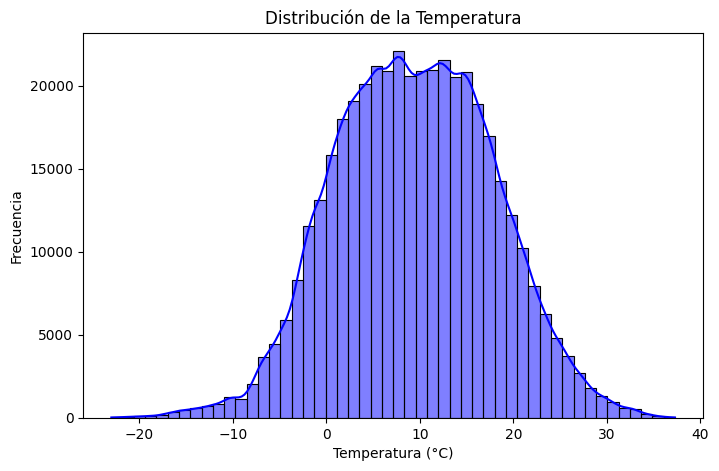

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la temperatura
plt.figure(figsize=(8, 5))
sns.histplot(df["T (degC)"], bins=50, kde=True, color="blue")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Temperatura")
plt.show()


In [ ]:
from scipy.stats import shapiro
print('Shapiro-Wilk Test:')
stat, p = shapiro(data['T (degC)'])
print('Statistics=%.6f, p=%e' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Normal (fail to reject H0)')
else:
 print('Sample does not look Normal (reject H0)')

Shapiro-Wilk Test:
Statistics=0.998383, p=3.747271e-42
Sample does not look Normal (reject H0)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 420551.
  res = hypotest_fun_out(*samples, **kwds)


Al realizar la prueba de normalidad Shapiro-Wilk se rechaza la hipotesis dado que el p valor es menor al nivel de significancia del 5% y se concluye que la temperatura en grados celsius no sigue una distribución normal.

# Analisis de estacionalidad


<ipython-input-18-956b49ac9a89>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Mes"], y=df["T (degC)"], palette="coolwarm")


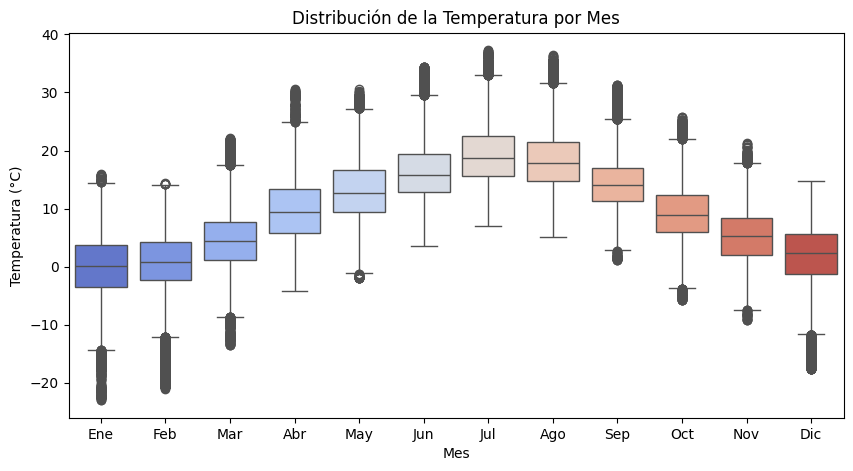

<ipython-input-18-956b49ac9a89>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Hora"], y=df["T (degC)"], palette="coolwarm")


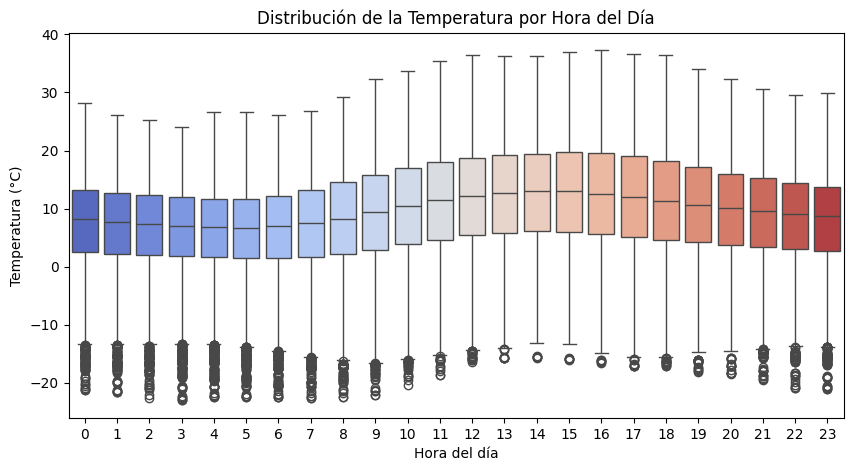

In [ ]:
# Extraer mes y hora del día
df["Mes"] = df["Date Time"].dt.month
df["Hora"] = df["Date Time"].dt.hour

# Promedio de temperatura por mes
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Mes"], y=df["T (degC)"], palette="coolwarm")
plt.xlabel("Mes")
plt.ylabel("Temperatura (°C)")
plt.title("Distribución de la Temperatura por Mes")
plt.xticks(range(0, 12), ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
plt.show()

# Promedio de temperatura por hora del día
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Hora"], y=df["T (degC)"], palette="coolwarm")
plt.xlabel("Hora del día")
plt.ylabel("Temperatura (°C)")
plt.title("Distribución de la Temperatura por Hora del Día")
plt.show()


<ipython-input-19-0feb7bac12f7>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.set_index("Date Time")["T (degC)"].resample("M").mean()


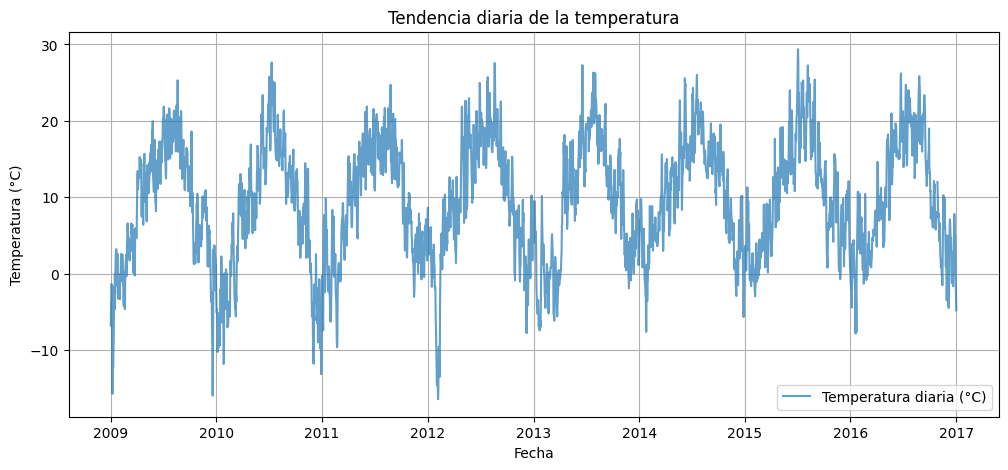

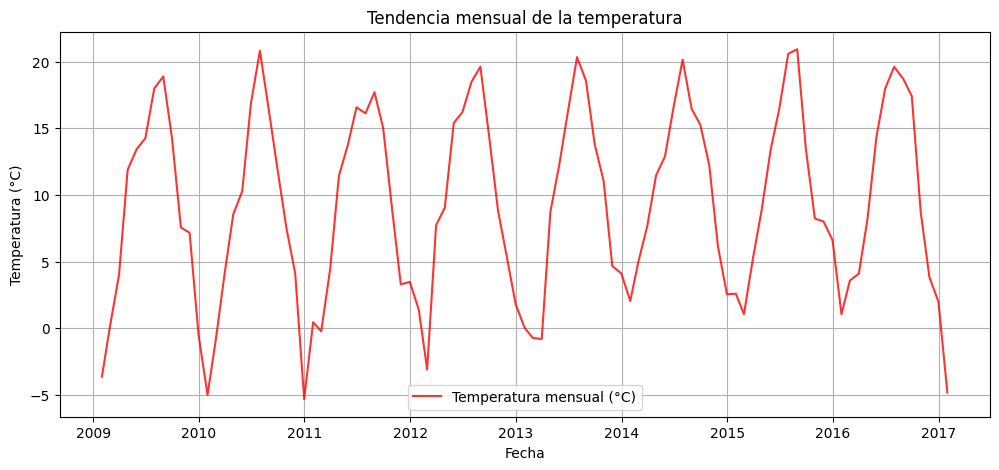

In [ ]:
import numpy as np

# Resampleo para ver tendencias diarias y mensuales
# Set 'Date Time' column as index before resampling
df_daily = df.set_index("Date Time")["T (degC)"].resample("D").mean()
df_monthly = df.set_index("Date Time")["T (degC)"].resample("M").mean()

# Gráfico de tendencias diarias
plt.figure(figsize=(12, 5))
plt.plot(df_daily, label="Temperatura diaria (°C)", alpha=0.7)
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.title("Tendencia diaria de la temperatura")
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()

# Gráfico de tendencias mensuales
plt.figure(figsize=(12, 5))
plt.plot(df_monthly, label="Temperatura mensual (°C)", color="red", alpha=0.8)
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.title("Tendencia mensual de la temperatura")
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()

# Evolución de la estacionalidad
A partir de las anteriores gráficas se puede observar que los meses con mayor temperatura en grados celsius registrados fueron los meses de Junio, Julio y Agosto. Mientras que los menores temperaturas se registraron en el mes de Enero. Por su parte los meses de Octubre, Noviembre y Diciembre también registraron bajas temperaturas, pero su media se mantuvo por encima de las media del mes de Enero.
Con la relación a la hora del día, se observa que el intervalor de una a cuatro de la tarde registra la mayor temperatura en grados celsius durante el día.

Se observa una alta variabilidad en la temperatura con fluctuaciones diarias evidentes.
Se nota un patrón estacional claro, con temperaturas más altas en ciertos meses y más bajas en otros, lo que sugiere una posible estacionalidad anual

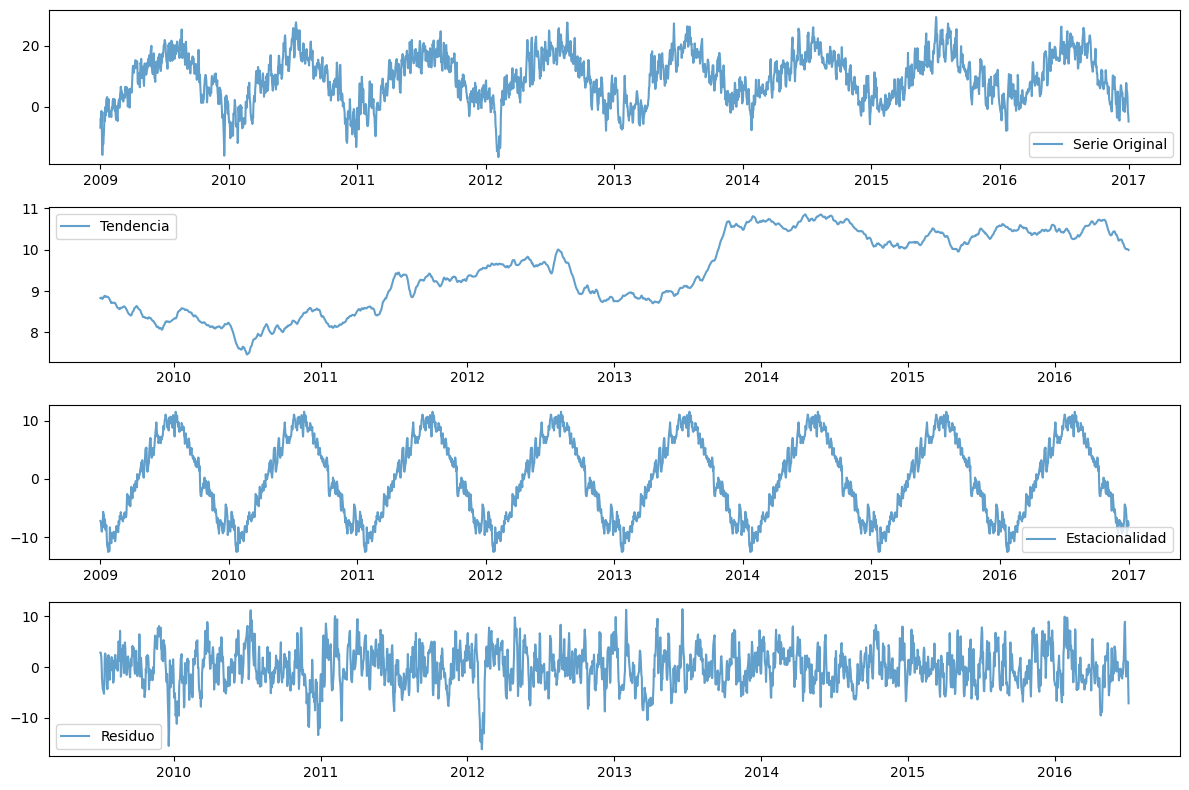

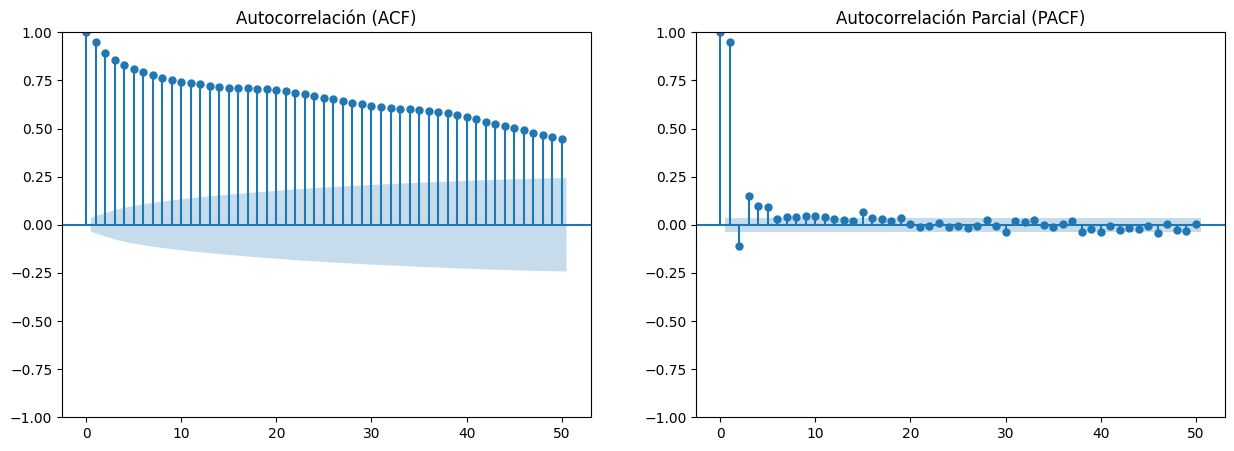

In [ ]:
# Interpolación de valores faltantes en la serie diaria
df_daily_interpolated = df_daily.interpolate()

# Aplicar descomposición estacional
decomposition = seasonal_decompose(df_daily_interpolated, model="additive", period=365)

# Graficar la descomposición
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df_daily_interpolated, label="Serie Original", alpha=0.7)
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label="Tendencia", alpha=0.7)
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label="Estacionalidad", alpha=0.7)
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label="Residuo", alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

# Autocorrelación y autocorrelación parcial
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de la función de autocorrelación (ACF)
sm.graphics.tsa.plot_acf(df_daily_interpolated, lags=50, ax=axes[0])
axes[0].set_title("Autocorrelación (ACF)")

# Gráfico de la función de autocorrelación parcial (PACF)
sm.graphics.tsa.plot_pacf(df_daily_interpolated, lags=50, ax=axes[1])
axes[1].set_title("Autocorrelación Parcial (PACF)")

plt.show()